In [ ]:
# @formatter:off
%load_ext autoreload
%autoreload 2
# @formatter:on

In [2]:
from chemgrid_game.chemistry.mol_chemistry import ChemistryWrapper
from chemgrid_game.chemistry.utils import create_unit_mol
from chemgrid_game.chemistry.utils import generate_random_mol
from chemgrid_game.plotting import plot_mols

from experiments.chemgrid_experiments.graph_search.search import GraphSearchExhaustive
from experiments.chemgrid_experiments.graph_search.search import GraphSearchHeuristic
from experiments.chemgrid_experiments.graph_search.search import GraphSearchRandom
from experiments.chemgrid_experiments.mol_graph import MolGraph

In [5]:
n_colors = 3
grid_size = 6
chemistry = ChemistryWrapper()

# Exhaustive

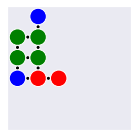

In [7]:
initial_mols = [create_unit_mol(i, grid_size=6) for i in range(1, n_colors + 1)]
archive = MolGraph(initial_mols)
target = generate_random_mol(seed=0, n_atoms=8, n_colors=n_colors, grid_size=grid_size)
fig, ax = plot_mols(target, m=1, n=1, scale=0.3, background=True)

In [8]:
search = GraphSearchExhaustive(archive)
search.search(100000, target)

100%|██████████| 100000/100000 [00:32<00:00, 3063.21it/s]


False

Saving graph to C:\Users\kepes\PycharmProjects\chemgrid_experiments\experiments\files\graphs


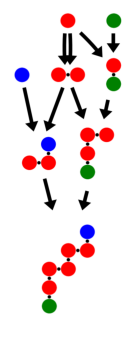

In [9]:
fig, ax = archive.plot_graph(hash(archive.get(pos=-1)))

# Random

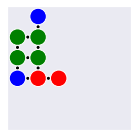

In [12]:
initial_mols = [create_unit_mol(i, grid_size=6) for i in range(1, n_colors + 1)]
archive = MolGraph(initial_mols)
target = generate_random_mol(seed=0, n_atoms=8, n_colors=n_colors, grid_size=grid_size)
fig, ax = plot_mols(target, m=1, n=1, scale=0.3, background=True)

In [13]:
search = GraphSearchRandom(archive)
search.search(100000, target)

100%|██████████| 100000/100000 [01:14<00:00, 1348.42it/s]


False

Saving graph to C:\Users\kepes\PycharmProjects\chemgrid_experiments\experiments\files\graphs


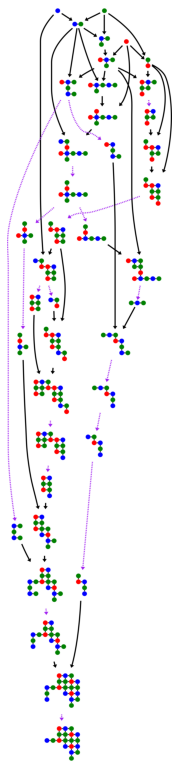

In [14]:
fig, ax = archive.plot_graph(archive.hashes[-1])

# Heuristic

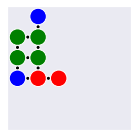

In [15]:
initial_mols = [create_unit_mol(i, grid_size=6) for i in range(1, n_colors + 1)]
archive = MolGraph(initial_mols)
target = generate_random_mol(seed=0, n_atoms=8, n_colors=n_colors, grid_size=grid_size)
fig, ax = plot_mols(target, m=1, n=1, scale=0.3, background=True)

In [16]:
search = GraphSearchHeuristic(archive, target, max_inventory_size=1000)
search.search(100000, target)

  0%|          | 240/100000 [00:00<00:34, 2933.37it/s]


True

Saving graph to C:\Users\kepes\PycharmProjects\chemgrid_experiments\experiments\files\graphs


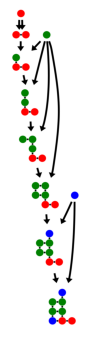

In [17]:
fig, ax = archive.plot_graph(hash(target))